# Essential Machine Learning for Physicists

<p align="right">
  <img src="../../misc/tum-logo.png" width="93" align="right" />
  <img src="../../misc/sixt-logo.png" width="70" align="right" /> 
<left><em>&copy; Zinonas Zinonos</em></left>
    
<left><em>For more information, visit <a href='https://github.com/zinon/essential-machine-learning-for-physicists'>essential-machine-learning-for-physicists</a></em></left>.
___
</p>

# Objective
Create a classification model that can predict whether or not a person has presence of heart disease based on physical features of that person (age, sex, cholesterol, etc).

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data

## General Info
This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. 
The `target` field refers to the presence of heart disease in the patient; it is integer (0 for no presence, 1 for presence). 
In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

## Content

The complete database contains 76 attributes, but all published experiments on this topic refer to using a subset of 14 of them. Attribute Information:

* age: age in years
* sex: sex (1 = male; 0 = female)
* cp: chest pain type
  - Value 1: typical angina
  - Value 2: atypical angina
  - Value 3: non-anginal pain
  - Value 4: asymptomatic
* trestbps: resting blood pressure (in mm Hg on admission to the hospital)
* chol: serum cholestoral in mg/dl
* fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg: resting electrocardiographic results
  - Value 0: normal
  - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach: maximum heart rate achieved
* exang: exercise induced angina (1 = yes; 0 = no)
* oldpeak = ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
  - Value 1: upsloping
  - Value 2: flat
  - Value 3: downsloping
* ca: number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

## Original Source

https://archive.ics.uci.edu/ml/datasets/Heart+Disease

## Creators:

- Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
- University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
- University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
- V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

# Task 1: load the dataset

### Load the dataset using the file "heart_disease.csv" in folder "datasets".

In [2]:
# MY CODE HERE
df = pd.read_csv(r"C:\Users\batvi\essential-machine-learning-for-physicists\datasets\heart_disease.csv")

# Task 2: inspect the data


### Display the column names.

In [3]:
# MY CODE HERE
df.columns.tolist()

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [24]:
# DO NOT EXECUTE ME!

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

### Show the first 5 rows.

Can you already recognise the continuous and discrete features? 

In [4]:
# MY CODE HERE
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# DO NOT EXECUTE ME!

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Show the shape of the dataframe.

In [54]:
# MY CODE HERE
df.shape

(303, 14)

In [7]:
# DO NOT EXECUTE ME!

(303, 14)

### Show the data type of each column.

In [55]:
# MY CODE HERE
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [5]:
# DO NOT EXECUTE ME!

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

### Show a statistics summary. 

In [5]:
# MY CODE HERE
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [6]:
# DO NOT EXECUTE ME!

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


# Task 3: feature exploration analysis

### Create a bar plot that presents the total counts per target value.

<Axes: xlabel='target', ylabel='count'>

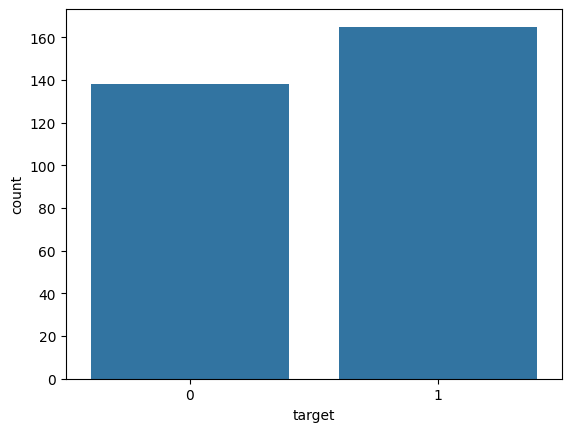

In [6]:
# MY CODE HERE
sns.countplot(x='target', data=df)

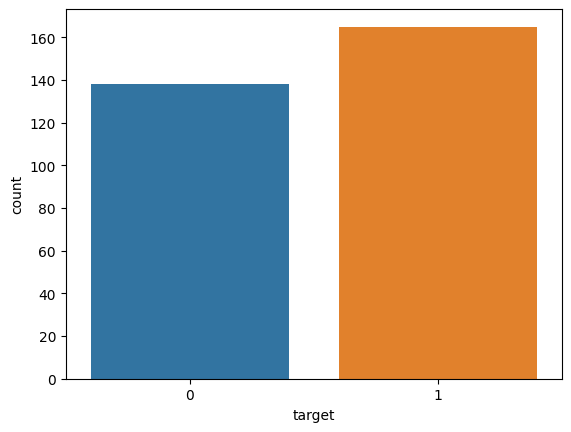

In [177]:
# DO NOT EXECUTE ME!

### Find the ratio 1:0. 

Are the target classes balanced or imbalanced?

In [7]:
# MY CODE HERE
df["target"].value_counts(normalize = True)

target
1    0.544554
0    0.455446
Name: proportion, dtype: float64

In [22]:
# DO NOT EXECUTE ME!

1    0.544554
0    0.455446
Name: target, dtype: float64

### Create a pair-plot of selected features

Note: Running a pairplot on everything can be very time-intensive due to the number of features to be rendered. 
So, let's create a features pair-plot that displays the relationships between the following columns:
- age
- trestbps
- chol
- thalach
- target

Set the `target` as the variable to map plot-aspects to different colors.

Observe the correlations between those features and the target.

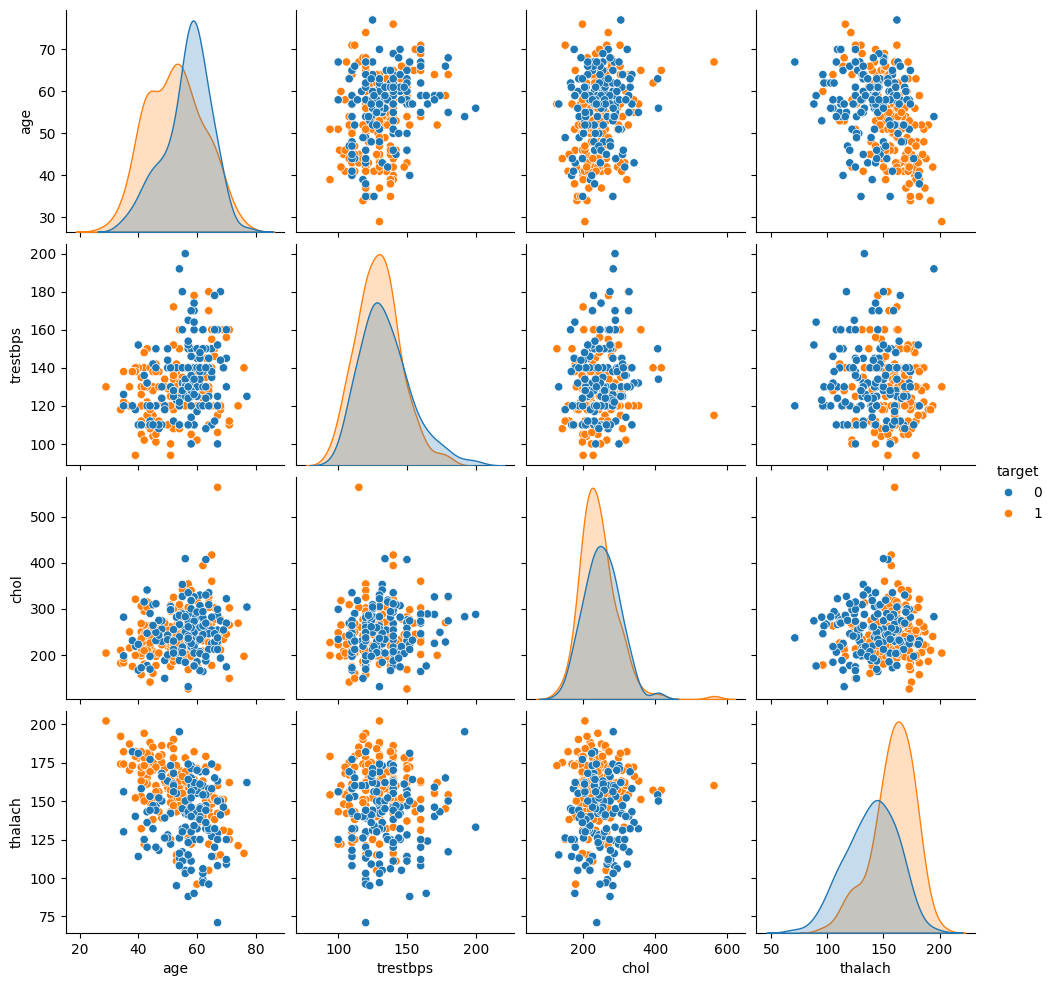

In [8]:
# MY CODE HERE
df_2 = df[["age", "trestbps", "chol", "thalach", "target"]]
sns.pairplot(df_2, hue='target')

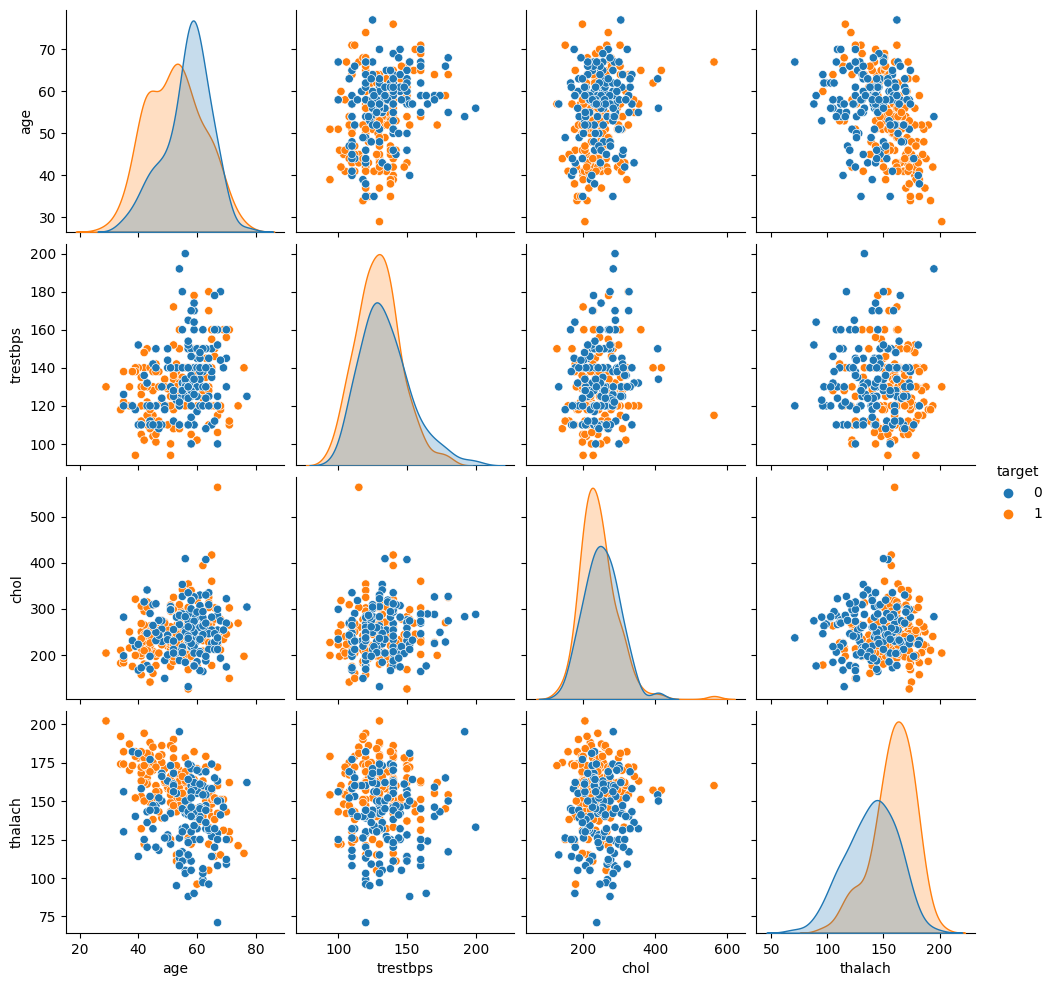

In [27]:
# DO NOT EXECUTE ME!

### Create a heatmap that displays the correlation between all the columns.

<Axes: >

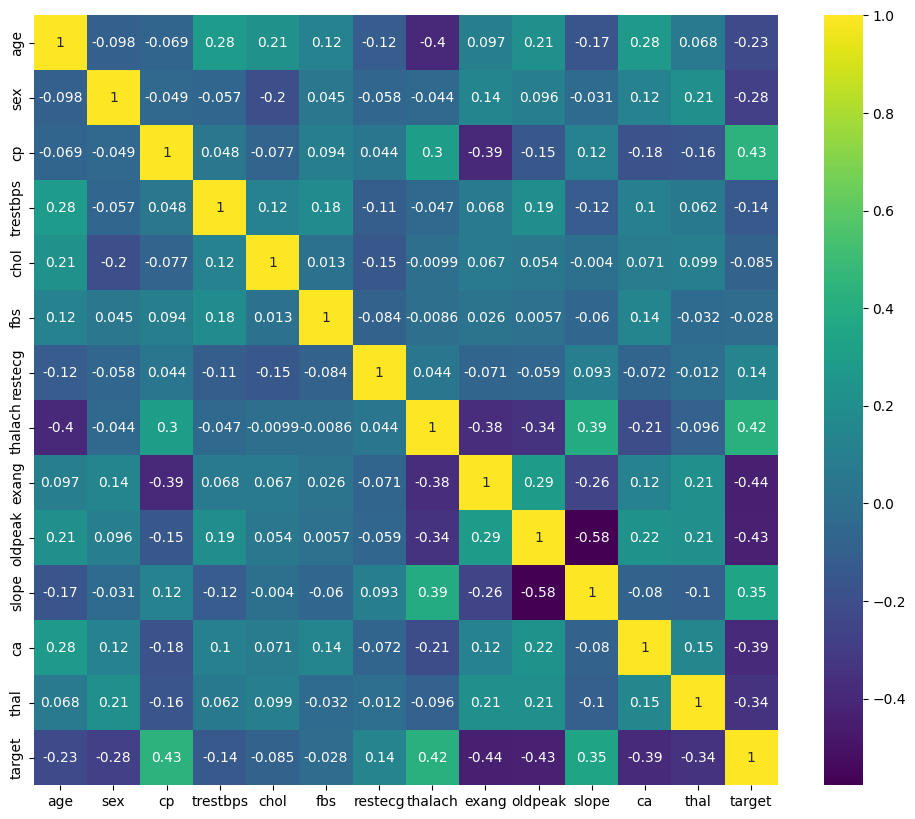

In [9]:
# MY CODE HERE
fig = plt.figure(figsize=(12, 10))
ax = fig.subplots()
sns.heatmap(df.corr(numeric_only=True), annot = True, cmap = "viridis")

<AxesSubplot: >

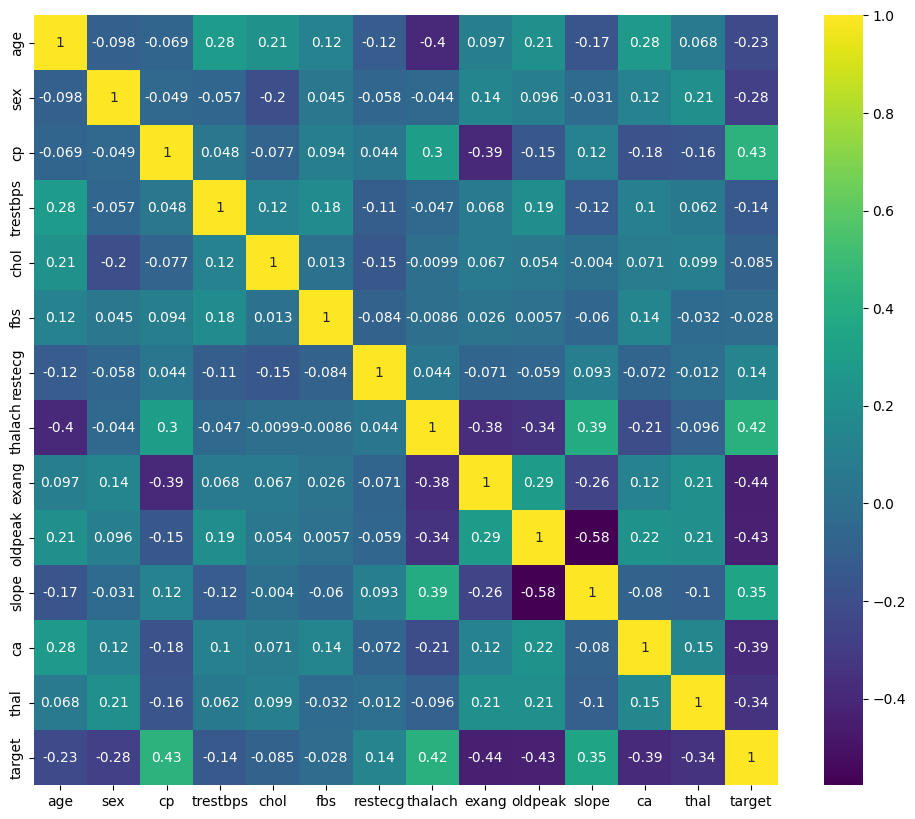

In [31]:
# DO NOT EXECUTE ME!

### Order the feature correlations to the target

In [10]:
# MY CODE HERE
df.corr(numeric_only=True).sort_values(by = "target", ascending = False).loc["cp":,"target"]

cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

In [39]:
# DO NOT EXECUTE ME!

cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

### Show the scatter plot between the top 2 correlated variables to the target.

<Axes: xlabel='cp', ylabel='target'>

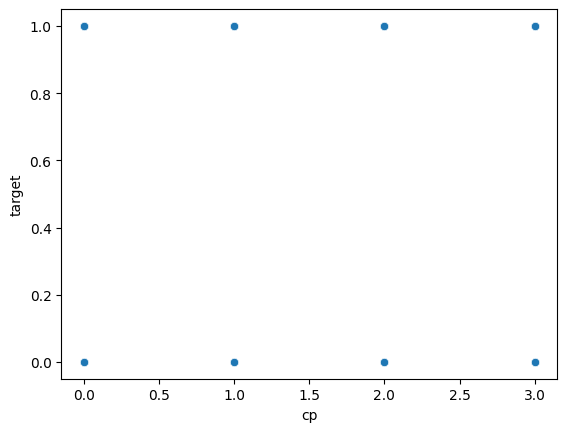

In [11]:
# MY CODE HERE
sns.scatterplot(x = df["cp"], y = df["target"])

<AxesSubplot: xlabel='cp', ylabel='target'>

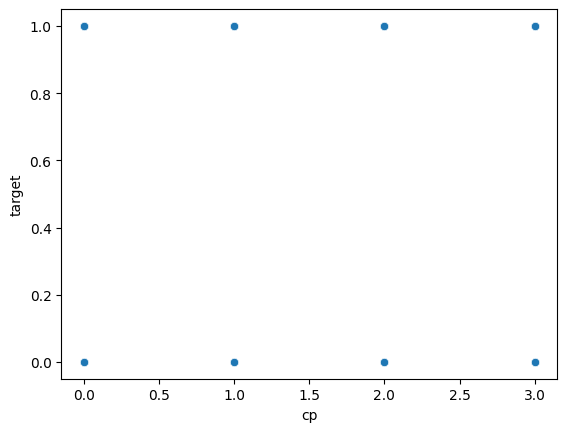

In [41]:
# DO NOT EXECUTE ME!

<Axes: xlabel='thalach', ylabel='target'>

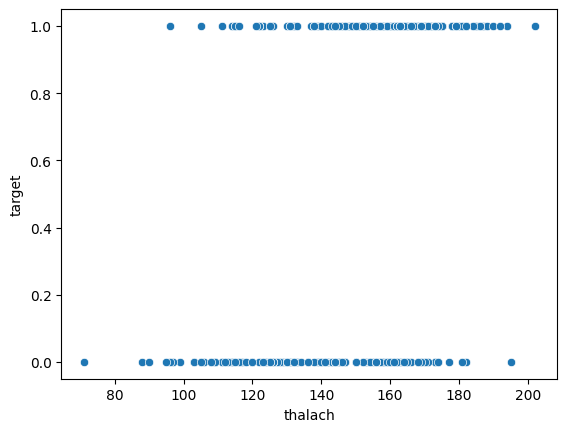

In [12]:
# MY CODE HERE
sns.scatterplot(x = df["thalach"], y = df["target"])

<AxesSubplot: xlabel='thalach', ylabel='target'>

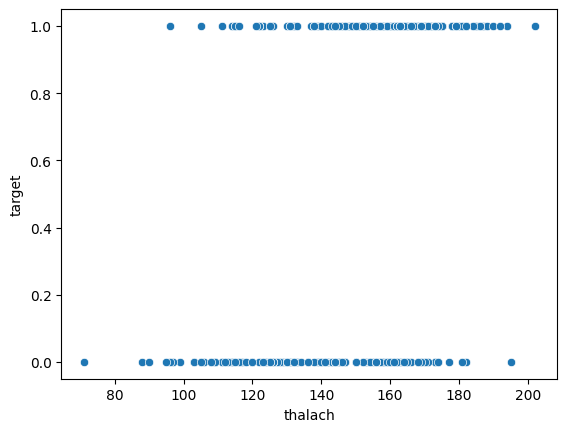

In [44]:
# DO NOT EXECUTE ME!

# Task 4: Data partitioning and scaling

## Separate the features from the labels into 2 arrays, $X$ and $y$.

In [13]:
# MY CODE HERE
X = df.drop("target", axis = 1)
y = df["target"]

### Perform a train test split on the data

Import the relevant python modules.
Create the two data partitions with the test size of 10% and a random state of 3. Show the size of the train and test feature arrays.

In [14]:
# MY IMPORTS  HERE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [15]:
# MY SPLIT CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state = 3)
X_train.shape, y_train.shape

((272, 13), (272,))

In [49]:
# DO NOT EXECUTE ME!

((272, 13), (31, 13))

### Normalize the feature data

Create a `StandardScaler` object and normalize the X train and test set feature data. 
Make sure you only fit to the training data to avoid data leakage, i.e. data knowledge leaking from the train set to the test set.

In [16]:
# MY SCALER INSTANCE HERE
scaler = StandardScaler()

In [17]:
# MY TRANSFORMATIONS HERE
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Task 5: Create a Logistic Regression Model

### Model creation and optimization

Create a `Logistic Regression` model and find the best, optimized setup. Find a well-performing `C` value (the inverse of regularization strength) in a hyper-parameter search.

To achieve this, there are two approaches:
1. Use LogisticRegressionCV
2. Use a combination of LogisticRegression and GridSearchCV. 

We have seen how the latter works in the lecture. Here, let's use the simpler LogisticRegressionCV approach with random state 33.

For the grid of `Cs` values, the best hyperparameter is selected by the cross-validator. Use

    help(LogisticRegressionCV)
   
to read the details.

In [18]:
# MY IMPORTS  HERE
from sklearn.linear_model import LogisticRegressionCV

In [19]:
# MY CODE HERE
model_cv = LogisticRegressionCV(scoring="accuracy", cv=5, random_state=33)
model_cv.fit(X_train_scaled, y_train)

LogisticRegressionCV(cv=5, random_state=33, scoring='accuracy')

In [56]:
# DO NOT EXECUTE ME!

LogisticRegressionCV(cv=5, random_state=33, scoring='accuracy')

### Show the model's parameters.

In [20]:
# MY CODE HERE
model_cv.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': 5,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 33,
 'refit': True,
 'scoring': 'accuracy',
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [57]:
# DO NOT EXECUTE ME!

{'Cs': 10,
 'class_weight': None,
 'cv': 5,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 33,
 'refit': True,
 'scoring': 'accuracy',
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

### Report back the search's optimal parameters

More specifically, show the best value obtained for $C$.

**Note:** You may obtain different hyperparameter values depending on how you conducted your search.

In [21]:
# MY CODE HERE
model_cv.C_

array([0.04641589])

In [58]:
# DO NOT EXECUTE ME!

array([0.04641589])

### Show the model's coefficients.

In [22]:
# MY CODE HERE
model_cv.coef_ # The coefficients represent the impact of each feature on the predicted outcome

array([[-0.11811222, -0.41694665,  0.47010687, -0.21811508, -0.08493195,
         0.0602848 ,  0.13487029,  0.32735022, -0.37034684, -0.4068542 ,
         0.23269778, -0.42906305, -0.36671696]])

In [66]:
# DO NOT EXECUTE ME!

array([[-0.11805309, -0.41683812,  0.47002204, -0.21815815, -0.08502396,
         0.06014974,  0.13495653,  0.32754636, -0.37032625, -0.40687911,
         0.23263769, -0.42908548, -0.36683123]])

### Create a visualization of the coefficients

Visualize the coefficients by using a barplot of their values. 
Try to sort the plot!

In [23]:
coefs = model_cv.coef_ # The coefficients represent the impact of each feature on the predicted outcome
se_coefs = pd.Series(index=X.columns, data=model_cv.coef_.ravel())
se_coefs = se_coefs.sort_values(ascending = False)

C:\Users\batvi\AppData\Local\Temp\ipykernel_32356\877121660.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=se_coefs.index, y=se_coefs.values, palette=pal, ax=ax)


[Text(0, 0, '0.5'),
 Text(0, 0, '0.3'),
 Text(0, 0, '0.2'),
 Text(0, 0, '0.1'),
 Text(0, 0, '0.1'),
 Text(0, 0, '-0.1'),
 Text(0, 0, '-0.1'),
 Text(0, 0, '-0.2'),
 Text(0, 0, '-0.4'),
 Text(0, 0, '-0.4'),
 Text(0, 0, '-0.4'),
 Text(0, 0, '-0.4'),
 Text(0, 0, '-0.4')]

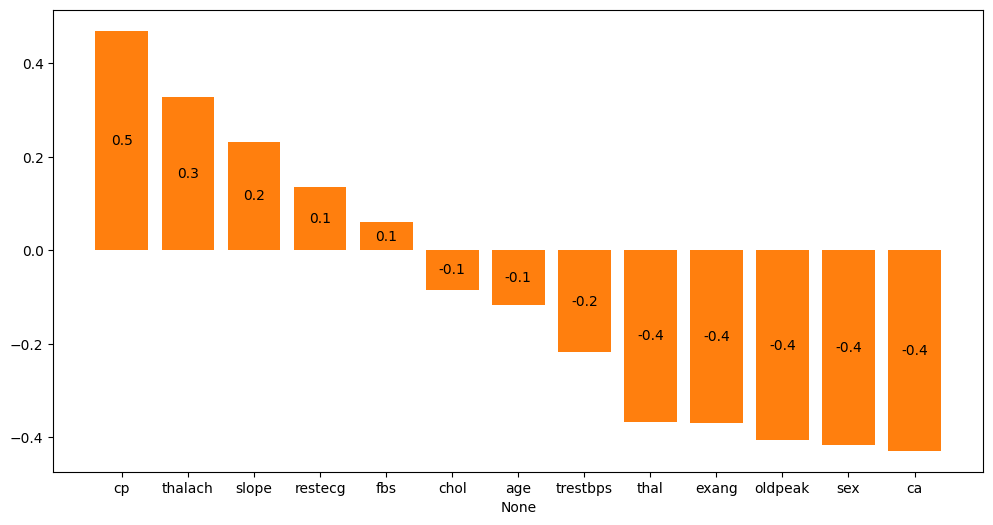

In [24]:
# MY CODE HERE
fig, ax = plt.subplots(figsize=(12,6))
pal = sns.color_palette("Greens_d", len(se_coefs))
sns.barplot(x=se_coefs.index, y=se_coefs.values, palette=pal, ax=ax)
ax.bar_label(ax.bar(se_coefs.index, se_coefs.values), fmt= '%0.1f', label_type='center')

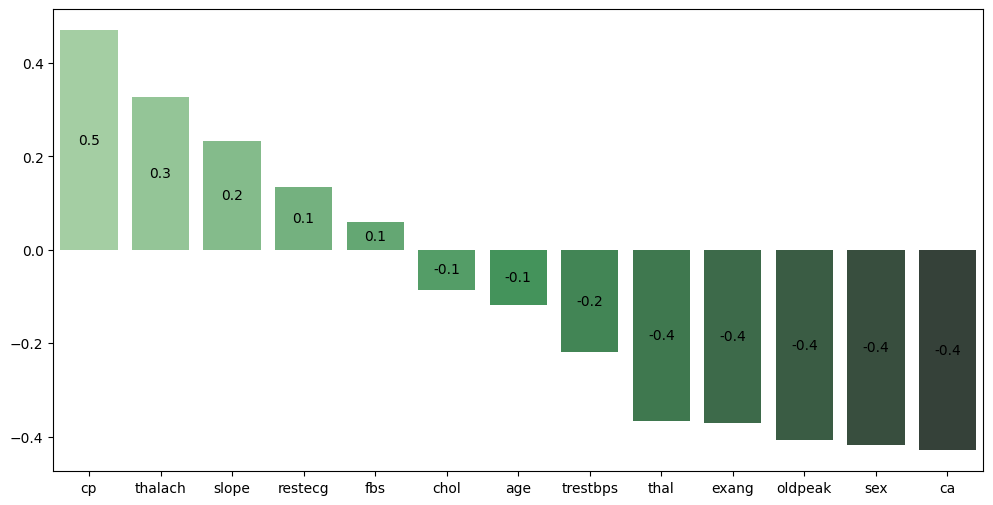

In [97]:
# DO NOT EXECUTE ME!

# Task 6: Model Performance Evaluation

Let's now evaluate the trained logistic model on the remaining 10% of the data, the test set.

### Perform predictions on the hold-out set.

In [28]:
# MY CODE HERE
y_test_pred = model_cv.predict(X_test_scaled)
y_test_pred

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1])

### Show the Confusion Matrix Array

In [29]:
# MY IMPORTS & CODE HERE
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
cm

array([[ 9,  3],
       [ 2, 17]])

In [102]:
# DO NOT EXECUTE ME!

array([[ 9,  3],
       [ 2, 17]])

### Create the Confusion Matrix plot

**Note**: there're many ways to do this task.

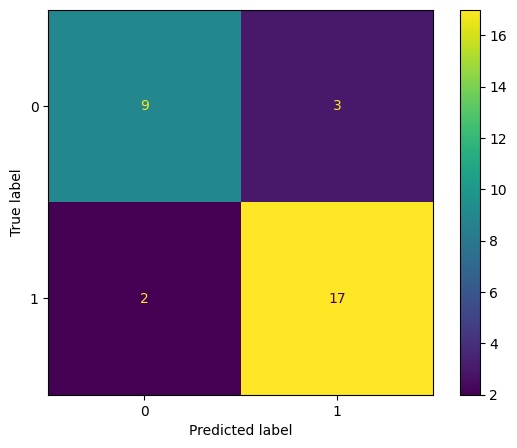

In [30]:
# MY IMPORTS & CODE HERE
from sklearn.metrics import ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(7,5))
cmd=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_cv.classes_)
cmd.plot(ax=ax);

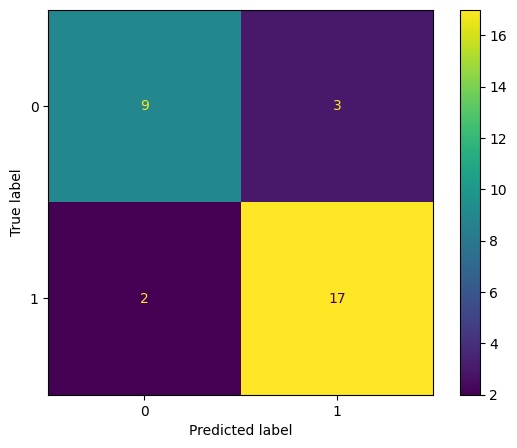

In [107]:
# DO NOT EXECUTE ME!

### Show the classification report

In [31]:
# MY IMPORTS & CODE HERE
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.85      0.89      0.87        19

    accuracy                           0.84        31
   macro avg       0.83      0.82      0.83        31
weighted avg       0.84      0.84      0.84        31



In [110]:
# DO NOT EXECUTE ME!

              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.85      0.89      0.87        19

    accuracy                           0.84        31
   macro avg       0.83      0.82      0.83        31
weighted avg       0.84      0.84      0.84        31



# Task 7: Performance Curves

### Create the ROC Curve.

In [32]:
# MY IMPORTS & CODE HEREfrom sklearn.metrics import RocCurveDisplay

In [34]:
RocCurveDisplay?

Init signature:
RocCurveDisplay(
    *,
    fpr,
    tpr,
    roc_auc=None,
    estimator_name=None,
    pos_label=None,
)
Docstring:     
ROC Curve visualization.

It is recommend to use
:func:`~sklearn.metrics.RocCurveDisplay.from_estimator` or
:func:`~sklearn.metrics.RocCurveDisplay.from_predictions` to create
a :class:`~sklearn.metrics.RocCurveDisplay`. All parameters are
stored as attributes.

Read more in the :ref:`User Guide <visualizations>`.

Parameters
----------
fpr : ndarray
    False positive rate.

tpr : ndarray
    True positive rate.

roc_auc : float, default=None
    Area under ROC curve. If None, the roc_auc score is not shown.

estimator_name : str, default=None
    Name of estimator. If None, the estimator name is not shown.

pos_label : int, float, bool or str, default=None
    The class considered as the positive class when computing the roc auc
    metrics. By default, `estimators.classes_[1]` is considered
    as the positive class.

    .. versionadded:: 0.24



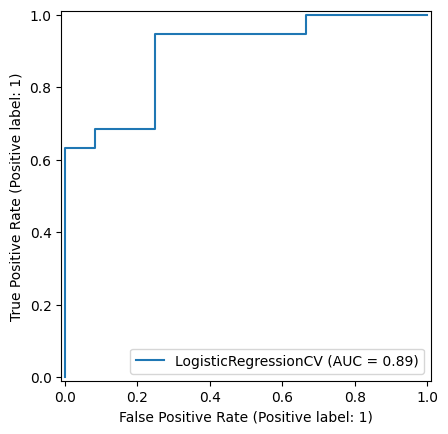

In [39]:
RocCurveDisplay.from_estimator(model_cv, X_test_scaled, y_test) # The function uses X_test_scaled as input to the model_cv to calculate predicted
# probabilities (or decision scores) for each instance. These scores are then used to compute the ROC curve.

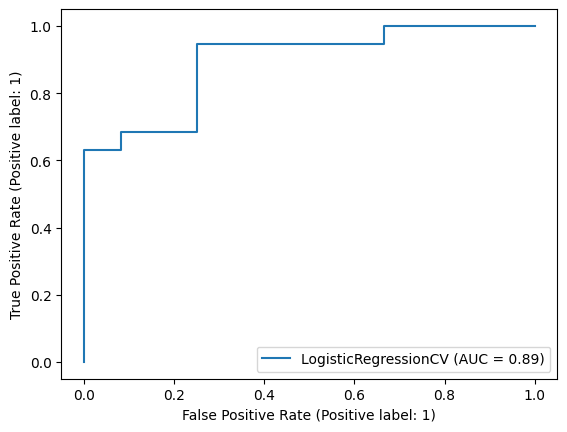

In [118]:
# DO NOT EXECUTE ME!

### Create both the precision recall curve.

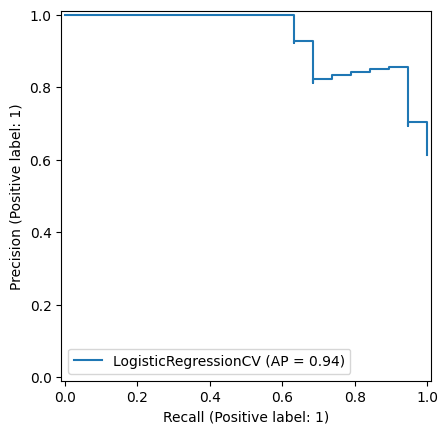

In [48]:
# MY IMPORTS & CODE HERE
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_estimator(model_cv, X_test_scaled, y_test)

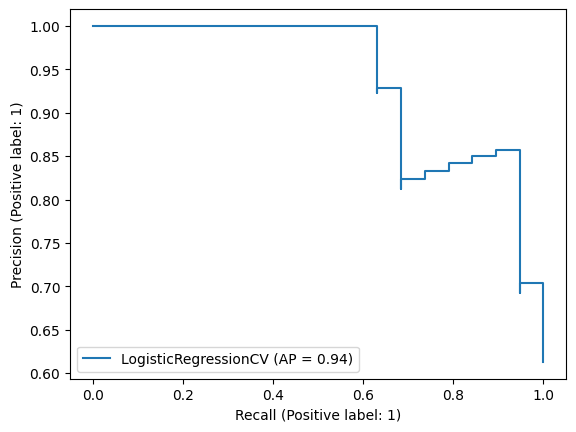

In [122]:
# DO NOT EXECUTE ME!

### Task 8: Real-time predictions

A patient with the following features has come into the medical office:

    age          48.0
    sex           1.0
    cp            0.0
    trestbps    124.0
    chol        274.0
    fbs           0.0
    restecg       0.0
    thalach     166.0
    exang         0.0
    oldpeak       0.5
    slope         1.0
    ca            0.0
    thal          3.0
    
- What does your model predict for this patient? 
- Do they have heart disease? 
- How confident is your model of this prediction?

Create an input array of the features for the patient above and conduct a prediction using your model.

In [50]:
# MY ARRAY HERE
patient_data = pd.DataFrame([{'age': 48.0, 'sex': 1.0, 'cp': 0.0, 'trestbps': 124.0, 'chol': 274.0, 
        'fbs': 0.0, 'restecg': 0.0, 'thalach': 166.0, 'exang': 0.0, 
        'oldpeak': 0.5, 'slope': 1.0, 'ca': 0.0, 'thal': 3.0}])

In [53]:
# MY SCALING HERE
patient_scaled = scaler.transform(patient_data)
patient_scaled

array([[-0.69627511,  0.66268653, -0.94547032, -0.41636355,  0.57812518,
        -0.40912342, -1.00310078,  0.74058952, -0.69737995, -0.4713027 ,
        -0.65775448, -0.7402631 ,  1.09379408]])

In [54]:
# Prediction CODE HERE
model_cv.predict(patient_scaled)

array([0])

In [172]:
# DO NOT EXECUTE ME!

array([0])

In [55]:
# Classes CODE HERE
model_cv.classes_

array([0, 1])

In [173]:
# DO NOT EXECUTE ME!F

array([0, 1])

In [57]:
# Prediction probabilities CODE HERE
proba = model_cv.predict_proba(patient_scaled)
proba

array([[0.54142022, 0.45857978]])

In [60]:
X_test.iloc[0]

age          48.0
sex           1.0
cp            0.0
trestbps    124.0
chol        274.0
fbs           0.0
restecg       0.0
thalach     166.0
exang         0.0
oldpeak       0.5
slope         1.0
ca            0.0
thal          3.0
Name: 245, dtype: float64

In [69]:
y_test.iloc[0]

np.int64(0)

In [174]:
# DO NOT EXECUTE ME!

array([[0.54141778, 0.45858222]])

In [175]:
# DO NOT EXECUTE ME! Data info

age          48.0
sex           1.0
cp            0.0
trestbps    124.0
chol        274.0
fbs           0.0
restecg       0.0
thalach     166.0
exang         0.0
oldpeak       0.5
slope         1.0
ca            0.0
thal          3.0
Name: 245, dtype: float64

In [176]:
# DO NOT EXECUTE ME! Predicted class

0

# Outstanding!